In [12]:
import h5py
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [15]:
filename = "prediction_values130_from100.hdf5" 
f = h5py.File(filename, 'r')
ls = list(f.keys())
print(ls)

['Y_predicted', 'Y_test_use']


In [16]:
Y_pred = f.get('Y_predicted')
Y_pred_arr = np.array(Y_pred)
print(Y_pred_arr)
print("Shape of prediction array is:",Y_pred_arr.shape)

[[0.56282866]
 [1.4788425 ]
 [0.41716197]
 ...
 [0.40085894]
 [1.6144621 ]
 [0.4649277 ]]
Shape of prediction array is: (82274, 1)


In [17]:
Y_test = f.get('Y_test_use')
Y_test_arr = np.array(Y_test)
# print(Y_test_arr)
print("shape of Y_test_use array is:", Y_test_arr.shape)

shape of Y_test_use array is: (82274, 12)


In [18]:
# print(list(Y_test.keys()))
# print(list(Y_pred.keys()))

In [19]:
#accessing 8th column of Y_test_use
Y_test_col = Y_test_arr[:,8]

print(Y_test_col)
print(Y_test_col.shape)

[1. 1. 0. ... 0. 1. 0.]
(82274,)


In [20]:
#creating false and true INDEXING arrays
def create_index(Y_test_col):
    false_index_arr = np.array([])
    true_index_arr = np.array([])
    for i in range(82274):
        if Y_test_col[i] == 0:
            false_index_arr = np.append(false_index_arr, i)
        elif Y_test_col[i] == 1:
            true_index_arr = np.append(true_index_arr, i)
        else:
            print('Error: non-binary entry')
            
    false_index_arr = false_index_arr.astype(int)
    true_index_arr = true_index_arr.astype(int)
    
    return false_index_arr, true_index_arr

In [21]:
# false_index_arr = false_index_arr.astype(int)
# true_index_arr = true_index_arr.astype(int)

In [22]:
# # np.set_printoptions(threshold=np.inf)
# # print(false_index_arr)
# print(false_index_arr)

In [23]:
#extracting false and true prob arrays from Y_pred_arr
def prob_arrays(Y_pred_arr, false_index_arr, true_index_arr):
    false_probs = np.array([])
    for i in false_index_arr:
        false_probs = np.append(false_probs, Y_pred_arr[int(i)])

    true_probs = np.array([])
    for i in true_index_arr:
        true_probs = np.append(true_probs, Y_pred_arr[int(i)])

    return false_probs, true_probs

In [24]:
#creating bins func

def create_bin_arr(num, ran = np.array([0,1])):
    bins = np.array([])
    n = 0
    add = np.max(ran)/num
    for i in range(num+1):
        bins = np.append(bins, n)
        n += add
    return bins

bins = create_bin_arr(400)
# print(bins)

In [25]:
# plotting histogram
def plot_save(false_probs, true_probs, bins, epoch, show = False, grid = False):
    plt.figure(1, figsize = (10,10))
    plt.hist(true_probs, bins,  range = (0,1), alpha = 0.6, color = 'blue', label = 'track')
    plt.hist(false_probs, bins,  range = (0,1), alpha = 0.6,  color = 'orange', label = 'cascade')
    plt.title('Track and Cascade Probability Frequencies at Epoch %s'%(epoch))
    plt.ylabel('frequency')
    plt.xlabel('probability')
    plt.legend()
    if grid == True:
        plt.grid()
    if show == True:
        plt.show()
    plt.savefig('hist%s'%(epoch))
    
    plt.close()
    
    return True

In [26]:
def get_arrays(f):
    Y_pred = f.get('Y_predicted')
    Y_pred_arr = np.array(Y_pred)
        
    Y_test = f.get('Y_test_use')
    Y_test_arr = np.array(Y_test)
    Y_test_col = Y_test_arr[:,8]
    
    return Y_pred_arr, Y_test_col



def plot_hists(end, start=1, bins = bins):
    for i in range(start, end):
        epoch = str(2*i)
        filename = "prediction_values%s.hdf5"%(epoch)
        f = h5py.File(filename, 'r')
        ls = list(f.keys())
        print(ls)
        
        Y_pred_arr, Y_test_col = get_arrays(f)
        
        false_index_arr, true_index_arr = create_index(Y_test_col)
        
        false_probs, true_probs = prob_arrays(Y_pred_arr, false_index_arr, true_index_arr)
        
        plot_save(false_probs, true_probs, bins, epoch)
        
    return True

['Y_predicted', 'Y_test_use']


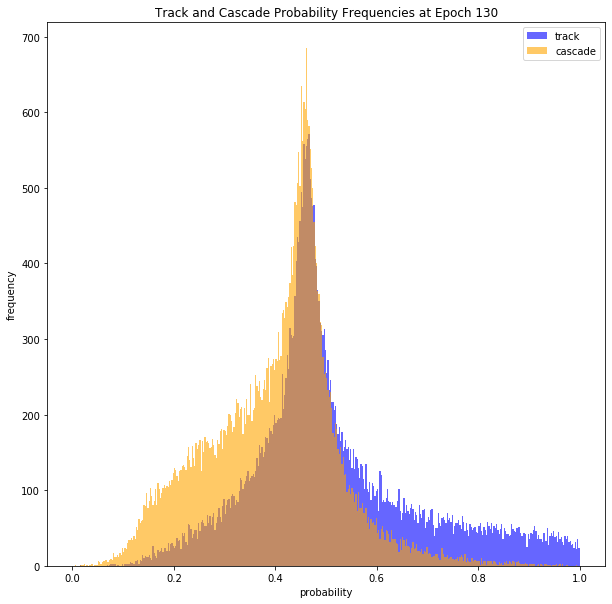

True

In [27]:
epoch = 130
filename = "prediction_values130_from100.hdf5"
f = h5py.File(filename, 'r')
ls = list(f.keys())
print(ls)
        
Y_pred_arr, Y_test_col = get_arrays(f)
        
false_index_arr, true_index_arr = create_index(Y_test_col)
        
false_probs, true_probs = prob_arrays(Y_pred_arr, false_index_arr, true_index_arr)
        
plot_save(false_probs, true_probs, bins, epoch, show=True)

In [28]:
plt.plot(np.linspace(0,154, 77), auc_array)

NameError: name 'auc_array' is not defined

In [3]:
import numpy as np
A = np.random.random(5)
print(A)

[0.20382433 0.6810389  0.73575285 0.85212291 0.88150458]


In [7]:
mask = A > 0.5 
A1 = A[mask]
print(A1)

[0.6810389  0.73575285 0.85212291 0.88150458]
